## Cómo hacer un análisis estadístico
##### Proceso
1. Importar los datos
    - Formatos: csv, json, xlsx.
    - Fuente  : Local, Internet.
    - .read_csv(ubicación)
2. Visualizar e identificar los tipos de datos sobre los que aplicaremos métodos estadísticos
    - Visualizar los datos con: `df.head(n)` // `df.tail(n)`visualiza n numero de observaciones
    - Podemos cambiar el nombre de las columnas con `df.columns`
    - Los datos pueden ser categóricos (ordinales o nominales) o numéricos (discretos o continuos),dependiendo del tipo de dato, aplicaremos métodos diferentes.
    - Métodos:
        - `df.dtype` (para mostrar el tipo de cada atributo) 
        - Datos categóricos: **Object** , **Bool**
        - Datos numércios  : **int64**(Discreto), **Float64**(Continuo)
        - `df.describe(include='all')` hace un análisis estadístico básico de todas las columnas

In [1]:
import pandas as pd

df = pd.read_csv('/work/heart.csv')

#### 1. Exploración de los datos

- it's important to examine the data so we can define the data types, validation, data cleaning
- the first data exploration its done using the following methods:
    - `df.head()` & `df.tail()` to show the first and last obsevations of the dataframe
    - `df.dtypes` & `df.info` to specify the data type of each column 
    - `df.describe` to recieve a basic analysis of the data that includes, mean, std deviation, quartiles and values counts for categorical variables.
    

#### Qué haces cuando hay datos perdidos?
- **Verificar** con la persona que recopiló los datos si se puede encontrar el valor faltante
- **Eliminar** los datos donde se encuentra el valor perdido, elimando toda la fila. Solamente se hace cuando son pocas las filas con datos perdidos (no es ideal eliminar datos)
    - con el método `dropna` podemos eliminar los datos, usando los argumentos `axis=0` para eliminar filas y  `axis=1` para eliminar columnas: `df.dropna(axis= 0)`
    - Podemos escoger una columna para buscar los na pasando el argumento `df.dropna(subset=['column_name'], axis=0)`
    - Estos métodos no alteran el dataframe original sino que crean un copia, si deseamos alterar el df debemos pasar el argumento `inplace = True` al final de la función `df.dropna(subset=['column_name'], axis=0, inplace=True)`
- **Reemplazar** los datos, se puede hacer calculando el valor promedio de la variable completa.
    - se utiliza el método `replace(old_data, new_data)` --> `df['columna3'].replace(np.nan, new_value)`
- **Dejar** los datos faltantes como datos perdidos.

#### Medidas de Tendencia Central

Nos dan una noción de donde están los datos usamos el promedio y la mediana principalmente

#### Medidas de dispersión

Con respecto a la medida central nos dice que tan dispersos están los datos

##### Cambiar variables categóricas a numéricas
- La mayoría de algoritmos de machine learning no aceptan cadenas de carácteres como enradas, debemos cambiar las variables categoricas a cualitativas numéricas, porque no se comportan como numeros si no solamente para generar una categoría basada en numeros
- Se utilizar el método `pd.get_dummies(df, columns = ['sex'], drop_first= True)`
- éste método crea tantas nuevas columnas como categorías en el atributo
- en este ejemplo crearía las columas `sex_F` y `sex_M`

#### Realizando un diagrama de frecuencias en un atributo continuo
- debemos agrupar los datos en rangos de datos
    - Encontrar el rango máximo de datos (max - min)
    - Encontrar la cantidad de intervalos o grupos (valor entero): $1+3.22*Log(n)$ `n: numero de datos`
    - Encontrar la amplitud de los intervalos: $\dfrac{range}{groups}$
    - podemos usar `df['columna'].plot.hist(bins= groups)`

##### Agrupando datos con pandas
- podemos agrupar conjuntos de datos numéricos con una categoría si esto facilita los análisis, por ejemplo rangos de edad.
- utilizamos el método `pd.cut`
- primero creamos una variable bins con una lista de los rangos `bins = [0,5,12,24,40,60,100]`
- `names = ['1','2','3','4','5','6']` variable con el nombre de etiqueta de los nuevos rangos
- `df['Edad'] = pd.cut(df['Edad'], bins, labels= names)`

<AxesSubplot:>

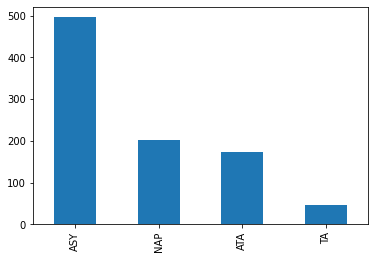

In [2]:
import seaborn as sns
df['ChestPainType'].value_counts().plot.bar()

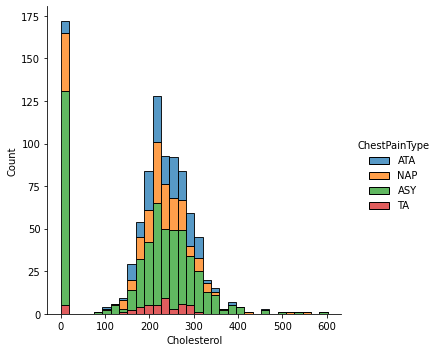

In [3]:
sns.displot(df, x= 'Cholesterol', hue= 'ChestPainType', multiple='stack')

In [4]:
# bins = [x for x in range(28,79,5)]
# labels = [x for x in range(1,11)]
# df['Age'] = pd.cut(df['Age'], bins, labels= labels)
# df['Age']

We can create a series of bool values by evaluating a column with an expression 

In [5]:

disease = df['HeartDisease'] == 1
not_disease = df['HeartDisease'] == 0

In [6]:
df_disease = df[disease]
# df_disease = df[df['HeartDisease] == 1]
df_disease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0
std,8.727056,19.828685,126.391398,0.472332,23.386923,1.151872,0.0
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0
75%,62.000000,145.000000,267.000000,1.000000,144.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


In [7]:
df_not_disease = df.loc[(df['HeartDisease'] == 1) & (df['Cholesterol'] <= 227), : ]
df_not_disease.index

Int64Index([  1,   3,   8,  11,  16,  32,  33,  44,  51,  57,
            ...
            897, 899, 901, 905, 907, 908, 909, 911, 914, 915],
           dtype='int64', length=284)

In [8]:
df.sort_values()

TypeError: sort_values() missing 1 required positional argument: 'by'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1e370e8e-dbeb-4c83-b321-fe23667b91ee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>